In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
#POPULATION
population=pd.read_csv('../csv/death_pollution/population_by_province.csv', encoding='utf-8')
population['Territorio']=population['Territorio'].replace({"Valle d'Aosta / Vallée d'Aoste":"Aosta"})
population['Territorio']=population['Territorio'].replace({"Bolzano / Bozen":"Bolzano"})
population['Territorio']=population['Territorio'].replace({"Forlì-Cesena":"Forlì"})
population['Territorio']=population['Territorio'].replace({"Massa-Carrara":"Massa"})
population['Territorio']=population['Territorio'].replace({"Monza e della Brianza":"Monza"})
population['Territorio']=population['Territorio'].replace({"Pesaro e Urbino":"Pesaro"})
population['Territorio']=population['Territorio'].replace({"Reggio di Calabria":"Reggio Calabria"})
population['Territorio']=population['Territorio'].replace({"Reggio nell'Emilia":"Reggio Emilia"})
population['Territorio']=population['Territorio'].replace({"Verbano-Cusio-Ossola":"Verbania"})
#Clean rows
population.drop(population.index[(population["Stato civile"]!="totale")], axis=0, inplace=True)
population.drop(population.index[(population["ETA1"]!="TOTAL")], axis=0, inplace=True)
#Clean columns
population.drop("ITTER107",axis=1,inplace=True)
population.drop("TIPO_DATO15",axis=1,inplace=True)
population.drop("SEXISTAT1",axis=1,inplace=True)
population.drop("STATCIV2",axis=1,inplace=True)
population.drop("TIME",axis=1,inplace=True)
population.drop("Flag Codes",axis=1,inplace=True)
population.drop("Flags",axis=1,inplace=True)
population.drop("Seleziona periodo",axis=1,inplace=True)
population.drop("Stato civile",axis=1,inplace=True)
population.drop("Tipo di indicatore demografico",axis=1,inplace=True)
population.drop("Sesso",axis=1,inplace=True)
population.drop("ETA1",axis=1,inplace=True)
population.drop("Età",axis=1,inplace=True)

#DEATHS
death=pd.read_csv('../csv/death_pollution/premature_deaths.csv', encoding='utf-8')
death['Territorio']=death['Territorio'].replace({"Valle d'Aosta / Vallée d'Aoste":"Aosta"})
death['Territorio']=death['Territorio'].replace({"Bolzano / Bozen":"Bolzano"})
death['Territorio']=death['Territorio'].replace({"Forlì-Cesena":"Forlì"})
death['Territorio']=death['Territorio'].replace({"Massa-Carrara":"Massa"})
death['Territorio']=death['Territorio'].replace({"Monza e della Brianza":"Monza"})
death['Territorio']=death['Territorio'].replace({"Pesaro e Urbino":"Pesaro"})
death['Territorio']=death['Territorio'].replace({"Reggio di Calabria":"Reggio Calabria"})
death['Territorio']=death['Territorio'].replace({"Reggio nell'Emilia":"Reggio Emilia"})
death['Territorio']=death['Territorio'].replace({"Verbano-Cusio-Ossola":"Verbania"})
death=death.sort_values(by=["Territorio"], ascending=True)
#Clean rows
death.drop(death.index[(death["Titolo di studio"]!="totale")], axis=0, inplace=True)
death.drop(death.index[(death["Paese di cittadinanza"]!="Totale")], axis=0, inplace=True)
death.drop(death.index[(death["Stato civile"]!="totale")], axis=0, inplace=True)
death.drop(death.index[(death["Territorio"]=="Sud Sardegna")], axis=0, inplace=True)
death.drop(death.index[(death["Paese di nascita"]!="Mondo")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="TOTAL")], axis=0, inplace=True)
#Delete young people from the count
death.drop(death.index[(death["ETA1"]=="Y_UN4")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y5-9")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y10-14")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y15-19")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y20-24")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y25-29")], axis=0, inplace=True)
#Delete old people from the count
death.drop(death.index[(death["ETA1"]=="Y75-79")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y70-74")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y65-69")], axis=0, inplace=True)
death.drop(death.index[(death["ETA1"]=="Y60-64")], axis=0, inplace=True)
#Clean columns
death.drop("ITTER107",axis=1,inplace=True)
death.drop("TIPO_DATO15",axis=1,inplace=True)
death.drop("Tipo dato",axis=1,inplace=True)
death.drop("SEXISTAT1",axis=1,inplace=True)
death.drop("STATCIV2",axis=1,inplace=True)
death.drop("TITOLO_STUDIO",axis=1,inplace=True)
death.drop("TIME",axis=1,inplace=True)
death.drop("Flag Codes",axis=1,inplace=True)
death.drop("Flags",axis=1,inplace=True)
death.drop("Seleziona periodo",axis=1,inplace=True)

death=death.groupby(by='Territorio').sum().reset_index()

#Inner-join between 'data' from death and population
result=pd.merge(death,population,on='Territorio')

#Create mortality index every 10000 people
result['Value_x']=(result['Value_x']/result['Value_y'])*10000

In [2]:
def test(pollutant):
    #POLLUTION
    pollution=pd.read_csv('../csv/Foglio_Chino.csv', encoding='utf-8', sep=',')
    pollution=pollution.rename(columns={"Unnamed: 0":"Territorio","Unnamed: 1":"VOTO","2018":"Pm10 2018","Unnamed: 3":"Pm2.5 2018",
    "Unnamed: 4":"NO2 2018","2017":"Pm10 2017","Unnamed: 6":"Pm2.5 2017", "Unnamed: 7":"NO2 2017",
    "2016":"Pm10 2016","Unnamed: 9":"Pm2.5 2016", "Unnamed: 10":"NO2 2016",
    "2015":"Pm10 2015","Unnamed: 12":"Pm2.5 2015", "Unnamed: 13":"NO2 2015",
    "2014":"Pm10 2014","Unnamed: 15":"Pm2.5 2014", "Unnamed: 16":"NO2 2014"})
    #Skip first row
    pollution=pollution.iloc[1:]
    #Inner-join between 'data' from result and pollution
    result2=pd.merge(result,pollution,on='Territorio')
    result2.drop(result2.index[(result2[pollutant]=="nd")], axis=0, inplace=True)
    result2=result2.sort_values(by=[pollutant], ascending=True)
    
    result2.plot.scatter(x='Value_x', y=pollutant)
    plt.xlabel('Death rate every 10000 people')
    plt.show()
    
    a = np.array(result2['Value_x']).astype(float)
    b = np.array(result2[pollutant]).astype(float)
    #Pearson
    print(scipy.stats.pearsonr(a, b))
    #Spearman
    print(scipy.stats.spearmanr(a, b))
    #Kendall
    print(scipy.stats.kendalltau(a, b))

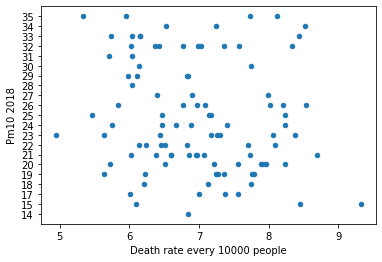

(-0.15909899212282488, 0.110219131165668)
SpearmanrResult(correlation=-0.16051237219184797, pvalue=0.10705246372374752)
KendalltauResult(correlation=-0.11364262402637995, pvalue=0.09850994680739643)


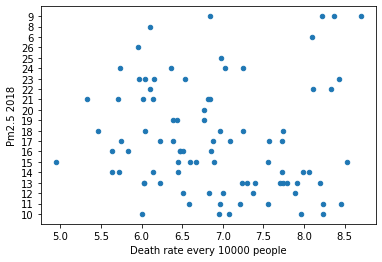

(-0.3480130506283499, 0.0008322263595565729)
SpearmanrResult(correlation=-0.36927228980810506, pvalue=0.00036916361982184374)
KendalltauResult(correlation=-0.26157396635109453, pvalue=0.00040520138790210405)


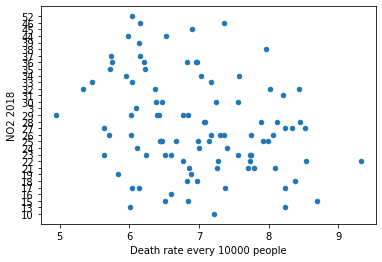

(-0.22285880666375085, 0.026608124399986513)
SpearmanrResult(correlation=-0.24025550148383182, pvalue=0.016604546199985984)
KendalltauResult(correlation=-0.16347543429364056, pvalue=0.01835666905899472)


In [3]:
#2018
test('Pm10 2018')
test('Pm2.5 2018')
test('NO2 2018')

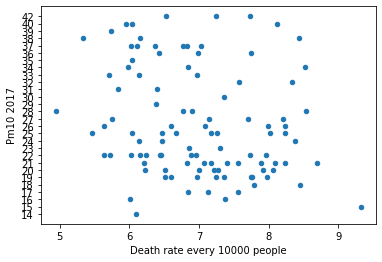

(-0.2150487116507292, 0.029149340181667333)
SpearmanrResult(correlation=-0.24407523386611354, pvalue=0.012971157389838074)
KendalltauResult(correlation=-0.16763931899009943, pvalue=0.014040690025268598)


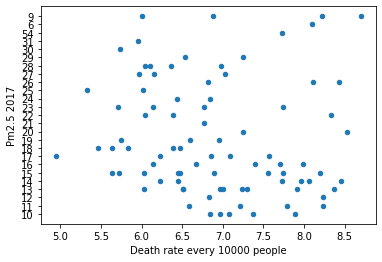

(-0.2269321213035493, 0.03453856572002436)
SpearmanrResult(correlation=-0.3454556663889555, pvalue=0.001048787503216058)
KendalltauResult(correlation=-0.23878326240626235, pvalue=0.001338133759686206)


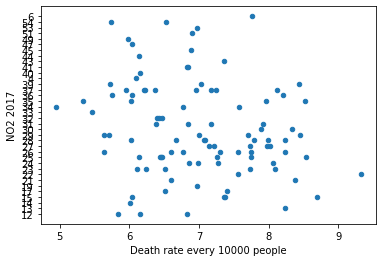

(-0.18963851006100074, 0.05751259958457655)
SpearmanrResult(correlation=-0.20071028039722116, pvalue=0.044163593597236886)
KendalltauResult(correlation=-0.13289554387569835, pvalue=0.05248402281568826)


In [4]:
#2017
test('Pm10 2017')
test('Pm2.5 2017')
test('NO2 2017')

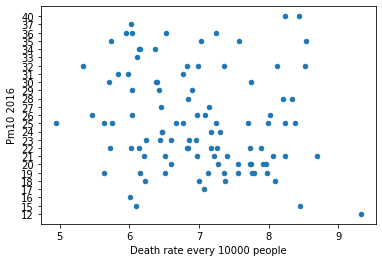

(-0.16862612912524896, 0.09022611530669998)
SpearmanrResult(correlation=-0.1982083755339988, pvalue=0.04582575086966483)
KendalltauResult(correlation=-0.1438377948972106, pvalue=0.03615318071362644)


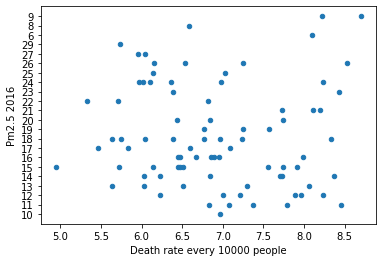

(-0.26430935139210315, 0.015119208134295152)
SpearmanrResult(correlation=-0.27897278035840806, pvalue=0.01017715676326494)
KendalltauResult(correlation=-0.19023309607036124, pvalue=0.012342069693504858)


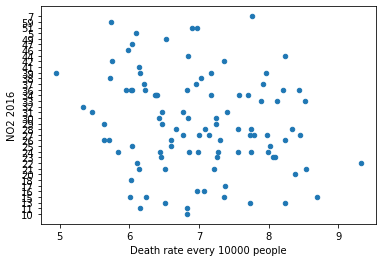

(-0.1817384168728687, 0.06753420243746246)
SpearmanrResult(correlation=-0.18188773705941552, pvalue=0.06730530660075003)
KendalltauResult(correlation=-0.1291819215016148, pvalue=0.057943447152386085)


In [5]:
#2016
test('Pm10 2016')
test('Pm2.5 2016')
test('NO2 2016')

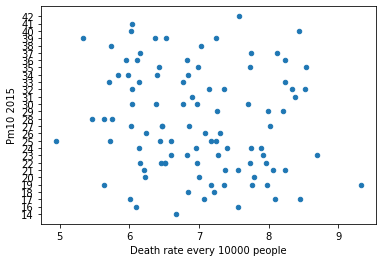

(-0.1421080822101692, 0.15630839120495674)
SpearmanrResult(correlation=-0.16451508667181147, pvalue=0.10017651065282215)
KendalltauResult(correlation=-0.11538930850727687, pvalue=0.09231648774818287)


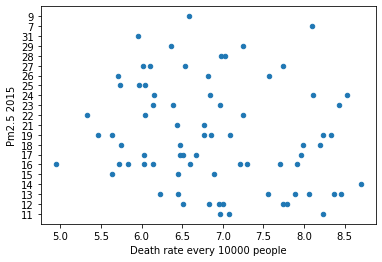

(-0.23909965256929697, 0.03751161308035488)
SpearmanrResult(correlation=-0.2444750400341207, pvalue=0.033306190931795036)
KendalltauResult(correlation=-0.16089868132635113, pvalue=0.044791392398956784)


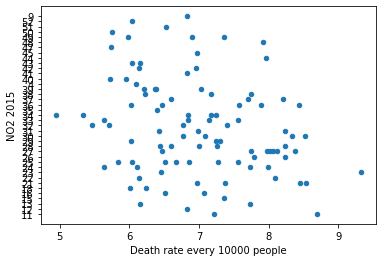

(-0.20308143546946095, 0.04166852361443998)
SpearmanrResult(correlation=-0.2250698625986281, pvalue=0.023642699803015248)
KendalltauResult(correlation=-0.15713248140558966, pvalue=0.021467988395609823)


In [6]:
#2015
test('Pm10 2015')
test('Pm2.5 2015')
test('NO2 2015')

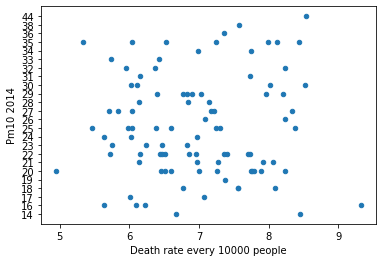

(0.05007680705768519, 0.6280116273176382)
SpearmanrResult(correlation=0.0013735420948219855, pvalue=0.9894031110761208)
KendalltauResult(correlation=-0.009016476435296737, pvalue=0.8989568442343354)


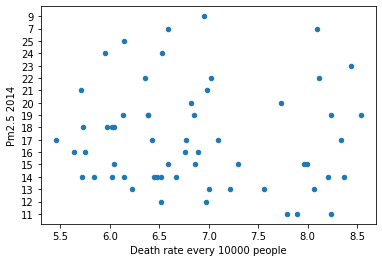

(-0.16221527822714232, 0.2196389030515357)
SpearmanrResult(correlation=-0.17933019500933006, pvalue=0.17413539690055307)
KendalltauResult(correlation=-0.1265940789723724, pvalue=0.16945419534214612)


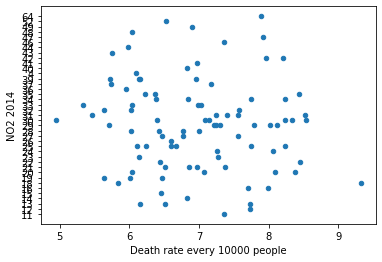

(-0.041784334438209274, 0.6876490469131383)
SpearmanrResult(correlation=-0.07721031685371817, pvalue=0.45705690723095527)
KendalltauResult(correlation=-0.04725064470896904, pvalue=0.5031961422789561)


In [7]:
#2014
test('Pm10 2014')
test('Pm2.5 2014')
test('NO2 2014')